In [ ]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

### Reading Data

In [2]:
df = pd.read_csv("loan.csv")

In [3]:
df

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved
...,...,...,...,...,...,...,...,...
56,39,Male,Architect,Master's,Married,100000,770,Approved
57,25,Female,Receptionist,High School,Single,32000,570,Denied
58,43,Male,Banker,Bachelor's,Married,95000,760,Approved
59,30,Female,Writer,Master's,Single,55000,650,Approved


### Data pre-processing and EDA

In [4]:
df.describe()

,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


In [5]:
df.shape

(61, 8)

In [6]:
df.isnull().sum()

age                0
gender             0
occupation         0
education_level    0
marital_status     0
income             0
credit_score       0
loan_status        0
dtype: int64

In [7]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [8]:
df.tail()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
56,39,Male,Architect,Master's,Married,100000,770,Approved
57,25,Female,Receptionist,High School,Single,32000,570,Denied
58,43,Male,Banker,Bachelor's,Married,95000,760,Approved
59,30,Female,Writer,Master's,Single,55000,650,Approved
60,38,Male,Chef,Associate's,Married,65000,700,Approved


In [9]:
df.columns

Index(['age', 'gender', 'occupation', 'education_level', 'marital_status',
       'income', 'credit_score', 'loan_status'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [11]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df['gender'] = df['gender'].astype(int)

In [12]:
df

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,0,Engineer,Bachelor's,Married,85000,720,Approved
1,45,1,Teacher,Master's,Single,62000,680,Approved
2,28,0,Student,High School,Single,25000,590,Denied
3,51,1,Manager,Bachelor's,Married,105000,780,Approved
4,36,0,Accountant,Bachelor's,Married,75000,710,Approved
...,...,...,...,...,...,...,...,...
56,39,0,Architect,Master's,Married,100000,770,Approved
57,25,1,Receptionist,High School,Single,32000,570,Denied
58,43,0,Banker,Bachelor's,Married,95000,760,Approved
59,30,1,Writer,Master's,Single,55000,650,Approved


In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


df['education_level_encoded'] = label_encoder.fit_transform(df['education_level'])
df.drop(columns=['education_level'], inplace=True)

print(df.head())

   age  gender  occupation marital_status  income  credit_score loan_status  \
0   32       0    Engineer        Married   85000           720    Approved   
1   45       1     Teacher         Single   62000           680    Approved   
2   28       0     Student         Single   25000           590      Denied   
3   51       1     Manager        Married  105000           780    Approved   
4   36       0  Accountant        Married   75000           710    Approved   

   education_level_encoded  
0                        1  
1                        4  
2                        3  
3                        1  
4                        1  


In [14]:
df['occupation_encoded'] = label_encoder.fit_transform(df['occupation'])
df.drop(columns=['occupation'], inplace=True)

df['marital_status_encoded'] = label_encoder.fit_transform(df['marital_status'])
df.drop(columns=['marital_status'], inplace=True)

df['loan_status_encoded'] = label_encoder.fit_transform(df['loan_status'])
df.drop(columns=['loan_status'], inplace=True)

print(df.head())

   age  gender  income  credit_score  education_level_encoded  \
0   32       0   85000           720                        1   
1   45       1   62000           680                        4   
2   28       0   25000           590                        3   
3   51       1  105000           780                        1   
4   36       0   75000           710                        1   

   occupation_encoded  marital_status_encoded  loan_status_encoded  
0                  12                       0                    0  
1                  35                       1                    0  
2                  33                       1                    1  
3                  16                       0                    0  
4                   0                       0                    0  


### Prepare the data

In [16]:
X = df.drop(columns=['loan_status_encoded'])
y = df['loan_status_encoded']

### Split the data into training and testing sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
X_train.shape

(48, 7)

In [19]:
y_train.shape

(48,)

In [20]:
X_test.shape

(13, 7)

In [21]:
y_test.shape

(13,)

### Build Model

In [22]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=42)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

### Make Predictions

In [23]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1])

### Evaluate the model

In [24]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9231


In [25]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9231


In [26]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[9 1]
 [0 3]]

True Positives(TP) =  9

True Negatives(TN) =  3

False Positives(FP) =  1

False Negatives(FN) =  0


### Visualize the results

<Axes: >

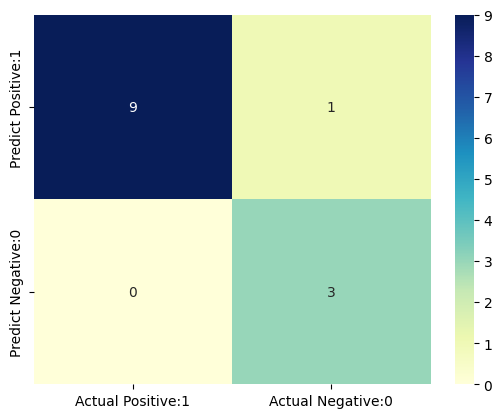

In [27]:
import seaborn as sns

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.75      1.00      0.86         3

    accuracy                           0.92        13
   macro avg       0.88      0.95      0.90        13
weighted avg       0.94      0.92      0.93        13



In [29]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [30]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9231


In [31]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0769


In [32]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9000


In [33]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 1.0000


In [34]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7500
